In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot,show
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/hbhattar/afs/Hemanta/metals/pythonScripts/function/')
import FDEAM as dream

## Interfacial thermal Conductivity


In [18]:
def thermalConductance(fileName, z1w, z1m, z2m, z2w, flux_omd ):
    rnemdFile = open(fileName)
    lines = rnemdFile.readlines()
    z = []
    T = []
    getFluxPos = False
    for line in lines:
        if getFluxPos:
            
            kinetic = float(line.split()[3])
            print(kinetic)
            getFluxPos = False
            
        if "Actual flux:" in line:
            getFluxPos = True
        
        if line[0] != '#':
            word = line.split()
            z.append(float(word[0]))
            T.append(float(word[1]))
    
    zArray = np.array(z)
    TArray = np.array(T)
    
    t1m = TArray[zArray == z1m]
    t2m = TArray[zArray == z2m]
    t1w = TArray[zArray == z1w]
    t2w = TArray[zArray == z2w]
    
    g_omd1 = flux_omd/(t1m-t1w)
    g_omd2 = flux_omd/(t2m-t2w)
    
    gOmdRevised_1 = kinetic/(t1m-t1w)
    gOmdRevised_2 = kinetic/(t2m-t2w)
    
    G_conversion_factor = 6.95e8
    dt1=(t1m-t1w)
    dt2=(t2m-t2w)
    G1 = g_omd1 * G_conversion_factor
    G2 = g_omd2 * G_conversion_factor
    
    G1Rev = gOmdRevised_1 * G_conversion_factor
    G2Rev = gOmdRevised_2 *  G_conversion_factor
    
    return G1, G2, dt1, dt2, G1Rev, G2Rev
    
    
    
    
    

In [19]:
def average_error_thermalConductance(path,fileList,z1w, z1m, z2m, z2w, flux_omd):
    G = []
    T = []
    G_rev = []
    for rnemd in fileList:
        rnemdFile = path + rnemd
        g = thermalConductance(rnemdFile,z1w, z1m, z2m, z2w, flux_omd)
        G.append(g[0])
        G.append(g[1])
        T.append(g[2])
        T.append(g[3])
        G_rev.append(g[4])
        G_rev.append(g[5])
    print("++++++++++++++++")
    print("Thermal Conductance\n")
    print(G)
    print("Temperature different\n")
    print(T)
    print("G revised\n")
    print(G_rev)
    average_G = np.mean(G)
    average_T = np.mean(T)
    average_GRev = np.mean(G_rev)
    G_conversion_factor = 6.95e8
    average_G_Prop = flux_omd * G_conversion_factor/average_T
    error_G = 1.96 * np.std(G)/np.sqrt(len(G))
    error_GRev = 1.96 * np.std(G_rev)/np.sqrt(len(G_rev))
    error_T = 1.96 * np.std(T)/np.sqrt(len(T))
    error_G_Prop = average_G_Prop * error_T/average_T
    return average_G, error_G,average_T, error_T, average_G_Prop, error_G_Prop,average_GRev,error_GRev



def average_Temp(path,fileList):
    
    T = []
    for file in fileList:
        try:
            T.append(dream.ReportExtractor(path+file,7)[0])
        except:
            print("Error: reading %s"%(file))
        
    
    average_T = np.mean(T)
    error_T = 1.96 * np.std(T)/np.sqrt(len(T))
    return average_T, error_T, np.std(T)

# Interfacial Thermal Conductivity

### Interfacial thermal conductivity of the water-gold interface, where gold is non fluctuating and water is SPC/E
##### System : MNWN
##### Result : 254.01 $\pm$ 17.46 $MWm^{-2}K^{-1}$
#### Temp: 299.17

In [21]:


rnemdList = []
reportList = []
for counter in range(1,6):
    rnemdList.append("MNWN_RNEMD_%d.rnemd"%(counter))
for counter in range(1,6):
    rnemdList.append("MNWN_RNEMD_NEW_%d.rnemd"%(counter))
    
for counter in range(1,6):
    reportList.append("MNWN_RNEMD_%d.report"%(counter))
for counter in range(1,6):
    reportList.append("MNWN_RNEMD_NEW_%d.report"%(counter))
    
path = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/MNWN/"
z1w, z1m, z2m, z2w = 53,59,89,95
flux_omd = 2.4999975e-06

average_error_thermalConductance(path, rnemdList,z1w, z1m, z2m, z2w, flux_omd)


2.4999975e-06
2.4999975e-06
2.4999975e-06
2.4999975e-06
2.4999975e-06
2.4999975e-06
2.4999975e-06
2.4999975e-06
2.4999975e-06
2.4999975e-06
++++++++++++++++
Thermal Conductance

[array([219.35450533]), array([302.25298513]), array([331.96438329]), array([235.19466862]), array([292.0552918]), array([319.24693706]), array([245.26524846]), array([246.61841635]), array([253.53390317]), array([238.99333328]), array([239.02390964]), array([226.93469531]), array([241.94995321]), array([237.57865913]), array([208.38934515]), array([231.67014172]), array([223.27601987]), array([204.64413233]), array([237.99878946]), array([344.31678811])]
Temperature different

[array([7.92096]), array([5.74849]), array([5.23399]), array([7.38749]), array([5.94921]), array([5.44249]), array([7.08416]), array([7.04529]), array([6.85312]), array([7.27007]), array([7.26914]), array([7.65638]), array([7.18123]), array([7.31336]), array([8.33775]), array([7.49988]), array([7.78184]), array([8.49034]), array([7.30045

(254.01310532077673,
 17.46657769961841,
 6.990593000000001,
 0.42411401652878794,
 248.54805057310583,
 15.079223183063327,
 254.01310532077673,
 17.46657769961841)

### Interfacial thermal conductivity of the water-gold interface, where gold is fluctuating and water is SPC/E
##### System : MFWN
##### Result : 279.68$\pm$ 16.21 $MWm^{-2}K^{-1}$
#### Temp: 302.53

In [22]:


rnemdList = []

for counter in range(1,11):
    rnemdList.append("MFWN_RNEMD_TC_New_%d.rnemd"%(counter))

path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD_Water_Gold/newbox/MFWN/"
z1w, z1m, z2m, z2w = 53,59,89,95
flux_omd = 2.4999997e-06
reportList = []   
for counter in range(1,11):
    reportList.append("MFWN_RNEMD_TC_New_%d.report"%(counter))
average_error_thermalConductance(path, rnemdList,z1w, z1m, z2m, z2w, flux_omd)



2.4999973e-06
2.4999973e-06
2.4999973e-06
2.4999973e-06
2.4999973e-06
2.4999973e-06
2.4999973e-06
2.4999973e-06
2.4999973e-06
2.4999973e-06
++++++++++++++++
Thermal Conductance

[array([288.7128294]), array([284.63305536]), array([212.85324964]), array([227.88675719]), array([228.6894077]), array([316.44355493]), array([296.44956458]), array([337.95081993]), array([236.94191363]), array([241.45389189]), array([292.43650407]), array([276.67061965]), array([321.14903748]), array([246.3556783]), array([280.40698016]), array([337.28952966]), array([258.84502094]), array([316.97408593]), array([312.44432943]), array([279.05949975])]
Temperature different

[array([6.01809]), array([6.10435]), array([8.1629]), array([7.6244]), array([7.59764]), array([5.49071]), array([5.86103]), array([5.14128]), array([7.33302]), array([7.19599]), array([5.94146]), array([6.28003]), array([5.41026]), array([7.05281]), array([6.19635]), array([5.15136]), array([6.71251]), array([5.48152]), array([5.56099]), 

(279.6823164809962,
 16.219150693229825,
 6.327148500000007,
 0.38308588669758037,
 274.610243698247,
 16.62665396637703,
 279.68204798594013,
 16.219135122843287)

### Interfacial thermal conductivity of the water-gold interface, where gold is non-fluctuating and water is TIP4P
##### System : MNWF
##### Result : 277.45$\pm$ 20.19 $MWm^{-2}K^{-1}$
#### Target Temp: 306K (nuclear), 279 (electronic)

In [24]:


rnemdList = []
for counter in range(1,11):
    rnemdList.append("MNWF_RNEMD_TC_New_%d.rnemd"%(counter))
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD_Water_Gold/newbox/MNWF/"
z1w, z1m, z2m, z2w = 53,59,89,95
flux_omd = 2.4999973e-06


reportList = []   
for counter in range(1,11):
        reportList.append("MNWF_RNEMD_TC_New_%d.report"%(counter))
average_Temp(path,reportList)
average_error_thermalConductance(path, rnemdList,z1w, z1m, z2m, z2w, flux_omd)


Error: reading MNWF_RNEMD_TC_New_1.report
Error: reading MNWF_RNEMD_TC_New_2.report
Error: reading MNWF_RNEMD_TC_New_3.report
Error: reading MNWF_RNEMD_TC_New_4.report
Error: reading MNWF_RNEMD_TC_New_6.report
Error: reading MNWF_RNEMD_TC_New_7.report
Error: reading MNWF_RNEMD_TC_New_8.report
Error: reading MNWF_RNEMD_TC_New_9.report
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
++++++++++++++++
Thermal Conductance

[array([286.75561027]), array([299.18228417]), array([297.94841903]), array([287.23582517]), array([283.60185741]), array([267.01040589]), array([315.05409389]), array([396.07235389]), array([275.06247265]), array([211.907071]), array([297.9479081]), array([315.23128903]), array([312.88119749]), array([301.7359384]), array([232.22064975]), array([231.32251699]), array([236.8483424]), array([284.28257203]), array([242.98328182]), array([173.885443])]
Temperature different

[array([6

(277.45847661828714,
 20.199301536429708,
 6.45188299999999,
 0.5194884323260779,
 269.30093485886255,
 21.683393898150037,
 277.45874297871234,
 20.199320927780114)

### Interfacial thermal conductivity of the water-gold interface, where gold is fluctuating and water is TIP4P
##### System : MFWF
##### Result : 291.58$\pm$ 19.86 $MWm^{-2}K^{-1}$
#### Target Temp: 

In [25]:

rnemdList = []
for counter in range(1,11):
    rnemdList.append("MFWF_RNEMD_290_%d.rnemd"%(counter))
path = "/afs/crc.nd.edu/user/h/hbhattar/Hemanta/metals/ThermalConductivity/MFWF/"
z1w, z1m, z2m, z2w = 53,59,89,95
flux_omd = 2.4999973e-06



reportList = []   
for counter in range(1,11):
        reportList.append("MFWF_RNEMD_290_%d.report"%(counter))
average_Temp(path,reportList)
average_error_thermalConductance(path, rnemdList,z1w, z1m, z2m, z2w, flux_omd)

Error: reading MFWF_RNEMD_290_1.report
Error: reading MFWF_RNEMD_290_2.report
Error: reading MFWF_RNEMD_290_3.report
Error: reading MFWF_RNEMD_290_4.report
Error: reading MFWF_RNEMD_290_5.report
Error: reading MFWF_RNEMD_290_6.report
Error: reading MFWF_RNEMD_290_7.report
Error: reading MFWF_RNEMD_290_8.report
Error: reading MFWF_RNEMD_290_9.report
Error: reading MFWF_RNEMD_290_10.report
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
++++++++++++++++
Thermal Conductance

[array([322.96824842]), array([307.20479991]), array([323.30117812]), array([249.24804094]), array([320.88657566]), array([227.87906638]), array([306.33278681]), array([321.96998097]), array([253.33758943]), array([403.69473988]), array([348.02374847]), array([308.26107275]), array([257.56777538]), array([233.07762379]), array([268.21355279]), array([274.49017814]), array([313.28908337]), array([277.13282827]), array([307.78381

/home/hbhattar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/hbhattar/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/hbhattar/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/hbhattar/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/hbhattar/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(291.58314754877017,
 19.866591479098506,
 6.1071314999999995,
 0.4267942889248778,
 284.5031457894758,
 19.88238141001388,
 291.5834274688941,
 19.86661055104693)

In [26]:
rnemdList = []
for counter in range(1,11):
    rnemdList.append("MNWN_TIP4P_RNEMD_TC_New_%d.rnemd"%(counter))
path = "/afs/crc.nd.edu/user/h/hbhattar/Hemanta/metals/ThermalConductivity/MNWN_TIP4P/"
z1w, z1m, z2m, z2w = 53,59,89,95
flux_omd = 2.4999973e-06



reportList = []   
for counter in range(1,11):
        reportList.append("MNWN_TIP4P_RNEMD_TC_New_%d.report"%(counter))
average_Temp(path,reportList)
average_error_thermalConductance(path, rnemdList,z1w, z1m, z2m, z2w, flux_omd)

2.4999975e-06
2.4999975e-06
2.4999975e-06
2.4999975e-06
2.4999975e-06
2.4999975e-06
2.4999975e-06
2.4999975e-06
2.4999975e-06
2.4999975e-06
++++++++++++++++
Thermal Conductance

[array([362.32827154]), array([306.95894316]), array([388.81772955]), array([240.76742514]), array([413.25217888]), array([280.16165119]), array([274.10953721]), array([302.52504187]), array([321.04488416]), array([361.91393282]), array([335.67318698]), array([253.01921397]), array([225.13976478]), array([337.82499256]), array([245.01171453]), array([335.44183259]), array([297.31875917]), array([250.07349268]), array([233.89339343]), array([254.95016522])]
Temperature different

[array([4.79537]), array([5.66036]), array([4.46867]), array([7.2165]), array([4.20445]), array([6.20177]), array([6.3387]), array([5.74332]), array([5.41201]), array([4.80086]), array([5.17616]), array([6.86706]), array([7.71742]), array([5.14319]), array([7.09149]), array([5.17973]), array([5.84389]), array([6.94795]), array([7.42859]

(301.01130557124753,
 23.433316359102477,
 5.952627000000007,
 0.45103364527386675,
 291.88761928136904,
 22.116476798359166,
 301.01132965217795,
 23.433318233769807)

In [27]:
rnemdList = []
for counter in range(1,11):
    rnemdList.append("MFWN_TIP4P_RNEMD_TC_New_%d.rnemd"%(counter))
path = "/afs/crc.nd.edu/user/h/hbhattar/Hemanta/metals/ThermalConductivity/MFWN_TIP4P/"
z1w, z1m, z2m, z2w = 53,59,89,95
flux_omd = 2.4999973e-06

average_error_thermalConductance(path, rnemdList,z1w, z1m, z2m, z2w, flux_omd)

2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
2.4999997e-06
++++++++++++++++
Thermal Conductance

[array([318.83917157]), array([292.62781298]), array([342.39114876]), array([433.85715622]), array([507.78946179]), array([379.94461517]), array([236.50660293]), array([323.07093874]), array([390.92075685]), array([377.65705084]), array([431.42894972]), array([228.94713503]), array([247.56857101]), array([292.44459091]), array([307.90544741]), array([348.86087985]), array([234.14586508]), array([319.3525313]), array([363.30939639]), array([220.32943864])]
Temperature different

[array([5.44945]), array([5.93757]), array([5.0746]), array([4.00477]), array([3.42169]), array([4.57303]), array([7.34651]), array([5.37807]), array([4.44463]), array([4.60073]), array([4.02731]), array([7.58908]), array([7.01825]), array([5.94129]), array([5.64296]), array([4.98049]), array([7.42058]), array([5.44069]), array([4.78242]

(329.89487605848615,
 32.990253813680155,
 5.548001499999993,
 0.5570769823204412,
 313.1754963476492,
 31.4460730484761,
 329.8951927579091,
 32.990285484358026)

In [28]:
from scipy import stats
def thermalConductivity(fileName, zBoundary, flux_omd, area,plotShow = False ):
    rnemdFile = open(fileName)
    lines = rnemdFile.readlines()
    z = []
    T = []
    z1, z2 = zBoundary
    for line in lines:
        if line[0] != '#':
            word = line.split()
            z.append(float(word[0]))
            T.append(float(word[1]))
    
    zArray = np.array(z)
    TArray = np.array(T)
    
    
    
    t_sel = TArray[np.logical_and(zArray > z1, zArray < z2)]
    z_sel = zArray[np.logical_and(zArray > z1, zArray < z2)]
    if plotShow:
        plot(z_sel,t_sel,'o')
        show()
    slope, intercept, r_value, p_value, std_err = stats.linregress(z_sel,t_sel)
    
    x = np.linspace(min(zArray), max(zArray), 1000)
    y = slope *x + intercept
    #plot(zArray,TArray,'o')
    #plot(x,y)
    #show()
    
    
    lambda_omd = flux_omd / abs(slope)
    lambda_convesion = 0.06947 * 1e6 # converted to W m^{-1} K^{-1}
    lambda_standard = lambda_omd * lambda_convesion
    
    
    
    return lambda_standard,abs(slope), r_value, std_err

In [32]:
def Regions(length):
    half = length/2
    half_region = 0.1*half
    z1 = half_region
    z2 = half - z1
    z3 = half + z1
    z4 = length - z1
    return [z1, z2], [z3, z4]

In [41]:
def average_error_thermalConductivity(path, fileList, zBoundary1, zBoundary2, area, flux_omd, plotShow = False):
    Lambda = []
    for rnemd in fileList:
        rnemdFile = path + rnemd
        Lambda_standard1, slope1, r_value1, std_err_1 = thermalConductivity(rnemdFile, zBoundary1, flux_omd, area, plotShow)
        Lambda_standard2, slope2, r_value2, std_err_2 = thermalConductivity(rnemdFile, zBoundary2, flux_omd, area, plotShow)
        Lambda.append(Lambda_standard1)
        Lambda.append(Lambda_standard2)
        
    
    average_Lambda = np.mean(Lambda)
    error_Lambda = 1.96 * np.std(Lambda)/np.sqrt(len(Lambda))
    return average_Lambda, error_Lambda, 1/average_Lambda, error_Lambda/average_Lambda**2

SPCE Water of length 40 Ang

In [42]:
length = 40 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("SPCE_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
flux_omd = 1.99e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

(0.7502800046321034,
 0.028479151707635313,
 1.3328357330945342,
 0.0505918201335635)

In [43]:
length = 50 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("SPCE_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
#flux_omd = 4e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

(0.8018544265963368,
 0.04347943833875731,
 1.2471091595075925,
 0.06762275545783902)

In [44]:
length = 60 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("SPCE_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
flux_omd = 1.99e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

(0.8500550866158993,
 0.0727203295633755,
 1.176394348725136,
 0.10063793050913118)

In [45]:
length = 70 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("SPCE_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
#flux_omd = 4e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

(0.8068329640137579,
 0.036523401599159344,
 1.2394139116791816,
 0.056105308115636014)

In [46]:
length = 80 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("SPCE_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
#flux_omd = 4e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

(0.8069879237020112,
 0.03878917131930165,
 1.2391759165522043,
 0.05956298168799512)

In [47]:
length = 90 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("SPCE_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
#flux_omd = 4e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

(0.796988450762554,
 0.038063083861310756,
 1.2547233263458282,
 0.05992387863054834)

In [48]:
length = 40 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("TIP4P_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
flux_omd = 1.99e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

(0.7588637198245054,
 0.0589514346447148,
 1.3177596633968214,
 0.1023686080185046)

In [49]:
length = 50 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("TIP4P_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
#flux_omd = 4e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

(0.7913702573692911,
 0.052164476964919285,
 1.26363101302827,
 0.08329432431589472)

In [50]:
length = 60 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("TIP4P_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
#flux_omd = 4e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

(0.8158705066676282,
 0.06586122949510909,
 1.2256847034273088,
 0.09894352214150663)

In [51]:
length = 70 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("TIP4P_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
flux_omd = 1.99e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

(0.7794420884331734,
 0.024237673234406263,
 1.2829689528444503,
 0.03989543637737269)

In [52]:
length = 80 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("TIP4P_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
flux_omd = 1.99e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

(0.7898789294496782,
 0.029557211266438257,
 1.266016806774067,
 0.04737425550869387)

In [53]:
length = 90 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("TIP4P_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
flux_omd = 1.99e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

(0.7571806977468418,
 0.049354134414899845,
 1.3206887113944143,
 0.08608440280683669)

In [54]:
length = 40 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("TIP4PFQ_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
flux_omd = 1.99e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

(0.41404509892850944,
 0.02446170760966099,
 2.4151958387814747,
 0.1426893219633142)

In [59]:
length = 50 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("TIP4P_FQ_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
flux_omd = 4e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

(0.7967184094914374,
 0.029808664904547904,
 1.2551486046849623,
 0.046960511664776605)

In [60]:
length = 60 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("TIP4P_FQ_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
flux_omd = 4e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

FileNotFoundError: [Errno 2] No such file or directory: '/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/TIP4P_FQ_60_RNEMD_1_New.rnemd'

In [58]:
length = 70 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("TIP4P_FQ_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
flux_omd = 4e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

(0.8224194806894497,
 0.023905737762935676,
 1.2159245050490308,
 0.03534397353144115)

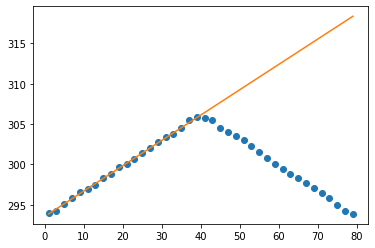

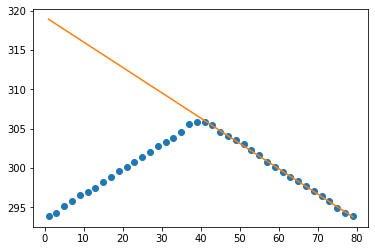

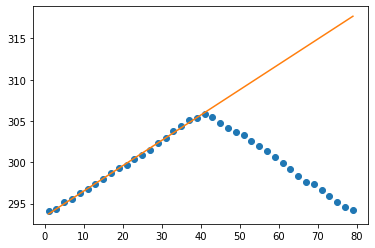

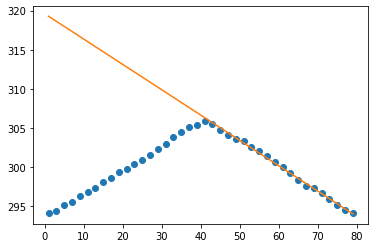

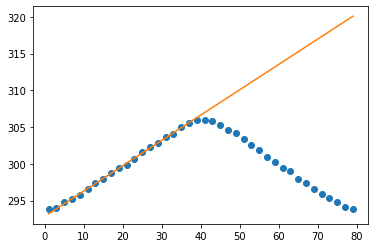

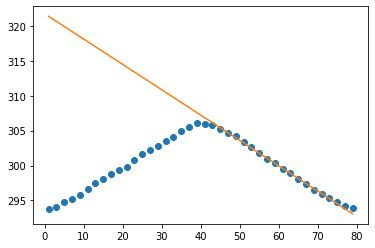

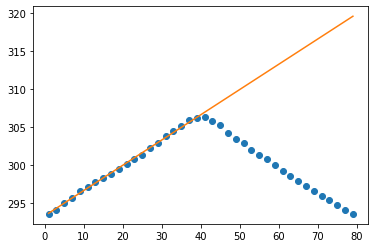

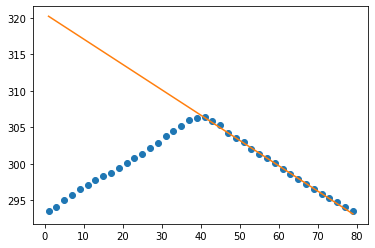

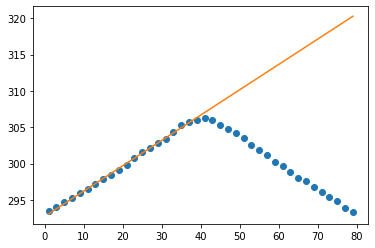

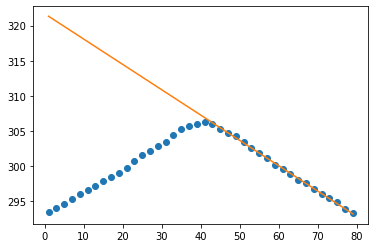

(0.8280333343610243, 0.02820039719281061)

In [43]:
length = 80 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("TIP4P_FQ_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
flux_omd = 4e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

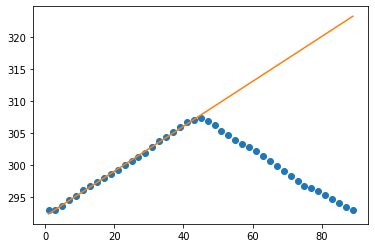

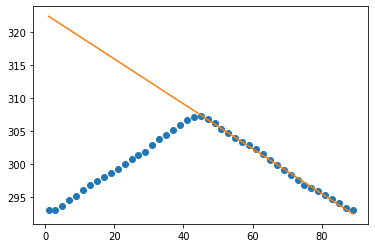

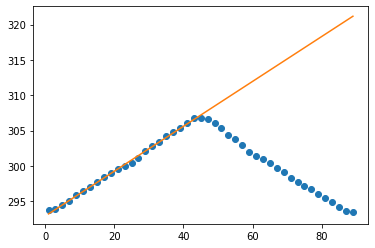

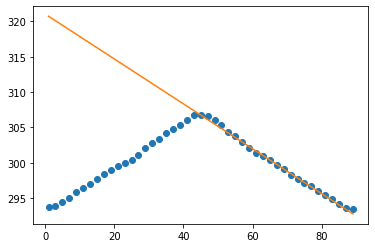

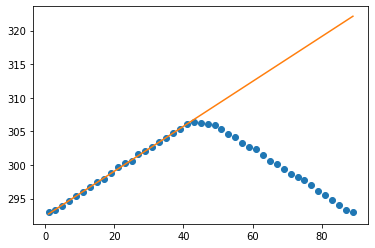

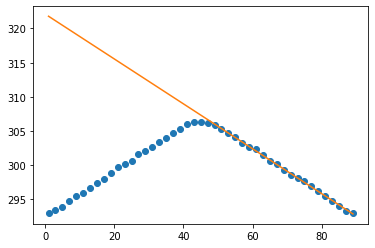

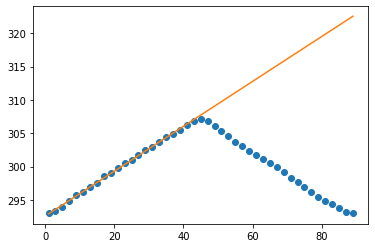

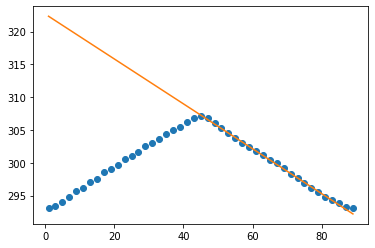

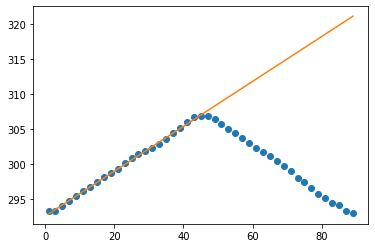

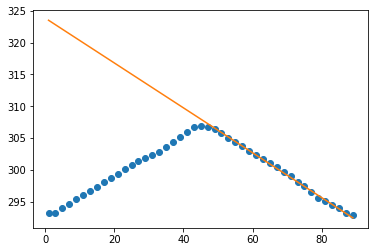

(0.8321581713298315, 0.019061735236612552)

In [44]:
length = 90 
water1, water2 = Regions(length)
area = 19.59 * 19.59

rnemdList = []
for counter in range(1,6):
    rnemdList.append("TIP4PFQ_%d_RNEMD_%d_New.rnemd"%(length,counter))
path = "/afs/crc.nd.edu/group/gezelter/hbhattar/Planar/WaterOnly/"
flux_omd = 4e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

In [14]:
def getColumnsOfRhoZ(fileName ):
    rnemdFile = open(fileName)
    lines = rnemdFile.readlines()
    z = []
    rho = []
    for line in lines:
        if line[0] != '#':
            word = line.split()
            z.append(float(word[0]))
            rho.append(float(word[1]))
    
    zArray = np.array(z)
    rhoArray = np.array(rho)
    return zArray, rhoArray

In [12]:
pathGroup = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD_Water_Gold/newbox/"
rnemd = "MNWN_RNEMD_1.RhoZ"
z,d=getColumnsOfRhoZ(pathGroup+ rnemd)
z

FileNotFoundError: [Errno 2] No such file or directory: '/home/hbhattar/groupspace/hbhattar/Planar/RNEMD_Water_Gold/newbox/MNWN_RNEMD_1.RhoZ'

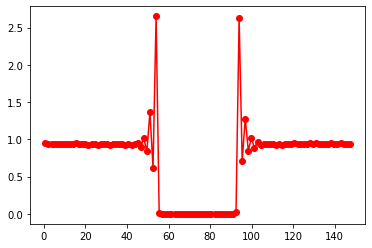

In [99]:
system = "MNWN"
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD_Water_Gold/newbox/"
z_final = np.zeros(100) 
d_final = np.zeros(100)
for counter in range(1,6):
    fileName = path + "%s_RNEMD_%d.RhoZ"%(system, counter)
    z,d=getColumnsOfRhoZ(fileName)
    z_final = z + z_final
    d_final = d + d_final
    
z_MNWN = z_final/5
d_MNWN = d_final/5

plt.plot(z_MNWN,d_MNWN,'or-')
plt.show()


In [100]:
system = "MFWN"
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD_Water_Gold/newbox/"
z_final = np.zeros(100) 
d_final = np.zeros(100)
for counter in range(1,6):
    fileName = path + "%s_RNEMD_%d.RhoZ"%(system, counter)
    z,d=getColumnsOfRhoZ(fileName)
    z_final = z + z_final
    d_final = d + d_final
    
z_MFWN = z_final/5
d_MFWN = d_final/5

(85, 110)

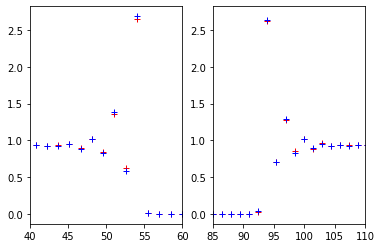

In [101]:
plt.subplot(1,2,1)
plt.plot(z_MNWN,d_MNWN,'+r')
plt.plot(z_MFWN,d_MFWN,'+b')
plt.xlim([40,60])
plt.subplot(1,2,2)
plt.plot(z_MNWN,d_MNWN,'+r')
plt.plot(z_MFWN,d_MFWN,'+b')
plt.xlim([85,110])

In [97]:
system = "MNWF"
path = "/afs/crc.nd.edu/user/h/hbhattar/Hemanta/metals/ThermalConductivity/"
z_final = np.zeros(100) 
d_final = np.zeros(100)
for counter in range(1,6):
    fileName = path + "%s_RNEMD_TC_%d.RhoZ"%(system, counter)
    z,d=getColumnsOfRhoZ(fileName)
    z_final = z + z_final
    d_final = d + d_final
    
z_MNWF = z_final/5
d_MNWF = d_final/5

(85, 110)

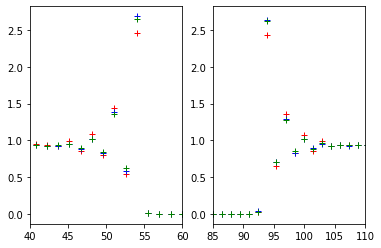

In [104]:
plt.subplot(1,2,1)
plt.plot(z_MNWF,d_MNWF,'+r')
plt.plot(z_MFWN,d_MFWN,'+b')
plt.plot(z_MNWN,d_MNWN,'+g')


plt.xlim([40,60])
plt.subplot(1,2,2)
plt.plot(z_MNWF,d_MNWF,'+r')
plt.plot(z_MFWN,d_MFWN,'+b')
plt.plot(z_MNWN,d_MNWN,'+g')

plt.xlim([85,110])

In [7]:
f = open("/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWF_Equlibrated.dump")
new = open("/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWF.dump",'w')

lines = f.readlines()
print("Start")
for line in lines:
    if "Time:" in line:
        line1 = line.split()
        line1[1] = str(int(float(line1[1])))
        line1.append("\n")
        line = " ".join(line1)
    new.write(line)
new.close()
f.close()
print("Done")

KeyboardInterrupt: 

In [128]:
name = "MNWN_TIP4P"
f = open("/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/%s.rcorrZ"%name)
x = open("/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/%s.rCorrXZ"%name,'w')
y = open("/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/%s.rCorrYZ"%name,'w')
z = open("/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/%s.rCorrZZ"%name,'w')
r = open("/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/%s.rCorr"%name,'w')





corr = None
lines = f.readlines()
for line in lines:
    if "corrVal" in line.split():
        print(line)
        corr = "r"
        continue
    if "corrValXZ"in line.split():
        corr = "x"
        continue
    if "corrValYZ"in line.split():
        corr = "y"
        continue
    if "corrValZZ"in line.split():
        corr = "z"
        continue
    if corr is "r":
        r.write(line)
    if corr is "x":
        x.write(line)
    if corr is "y":
        y.write(line)
    if corr is "z":
        z.write(line)
r.close()
x.close()
y.close()
z.close()
f.close()

#time	corrVal



In [302]:

from matplotlib import rcParams
params = {
    'font.family':'serif',
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   }
rcParams.update(params)

class corrFx(object):
    def __init__(self, fileName, N=300,xmax = 1e6, xmin = 0,ymin=0,ymax=1000,color='blue',z = [] ):
        self.fileName = fileName
        self.N = N
        self.xmax = xmax
        self.xmin = xmin
        self.ymax = ymax
        self.ymin = ymin
        self.z = z
        self.color = color
    def set_ymax(self, ymax):
        self.ymax = ymax
    def set_xmax(self,xmax):
        self.xmax = xmax
    def set_index(self,z):
        self.z = z
    def set_color(self, color):
        self.color = color
    def Plot(self):
        import seaborn as sns
        palette = sns.light_palette(self.color, self.N)
        f = pd.read_csv(self.fileName, delimiter = "\t", header = None)
        fig1 = plt.figure(num=None, figsize=(8,8))
        ax1 =  fig1.add_subplot()
        N = self.N
        if len(self.z)==0:
            self.z = range(1,N)
        plt.xlim(self.xmin,self.xmax)
        plt.ylim(self.ymin,self.ymax)
        
        for columns in range(1,len(self.z)):
            plotFinal=plt.plot(f[self.z[columns]],color = palette[columns],label=str(self.z[columns]),linewidth=4)
        
        sns.palplot(sns.light_palette(self.color))
        return plotFinal
        
        
        #plt.legend(loc=2,prop={'size':12}, title ="Index",ncol =10)
        
        


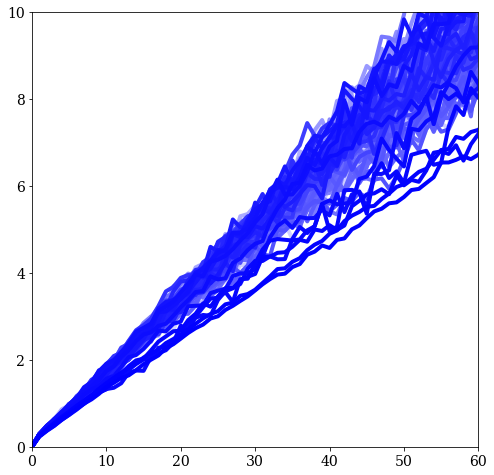

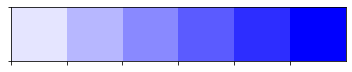

In [308]:
file = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorrYZ"
#z = range()
z=[x for x in range(1,107)]
corr = corrFx(file,N=len(z),xmax= 100,z=z, ymax=100)
corr.set_ymax(10)
corr.set_xmax(60)
corr.Plot()

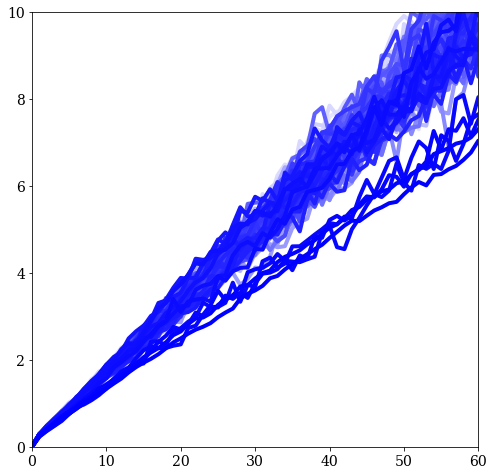

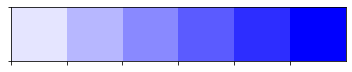

In [304]:
file = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorrXZ"
#z = range()
z=[x for x in range(1,107)]
corr = corrFx(file,N=len(z),xmax= 100,z=z, ymax=100)
corr.set_ymax(10)
corr.set_xmax(60)
corr.Plot()


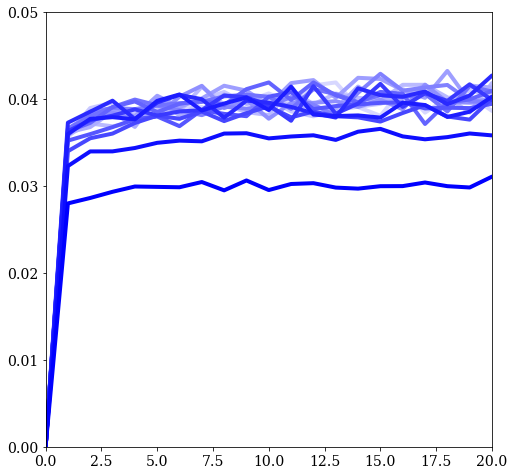

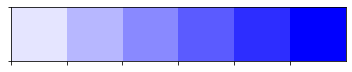

In [305]:
file = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorrZZ"
#z = range()
z=[x for x in range(90,107)]
corr = corrFx(file,N=len(z),xmax= 20,z=z, ymax=0.05)
#corr.set_ymax(10)
#corr.set_xmax(60)
corr.Plot()


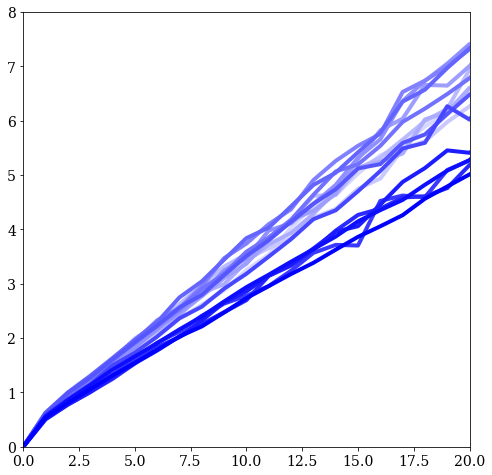

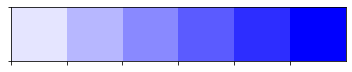

In [326]:
file = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorr"
#z = range()
z=[x for x in range(90,107)]
corr = corrFx(file,N=len(z),xmax= 20,z=z, ymax=8)
#corr.set_ymax(10)
#corr.set_xmax(60)
ff=corr.Plot()

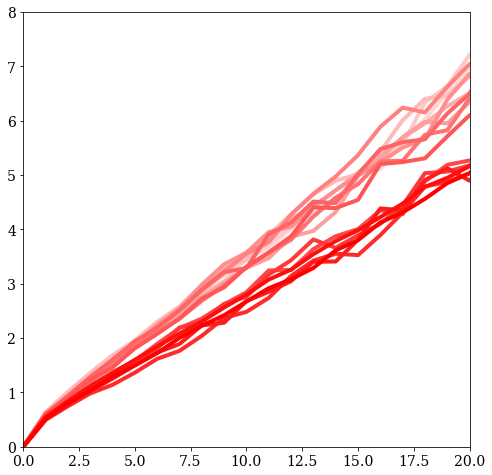

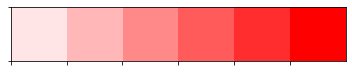

In [334]:
file = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MFWN.rCorr"
#z = range()
z=[x for x in range(90,107)]
corr = corrFx(file,N=len(z),xmax= 20,z=z, ymax=8)
corr.set_color('red')
#corr.set_ymax(10)
#corr.set_xmax(60)
gg=corr.Plot()

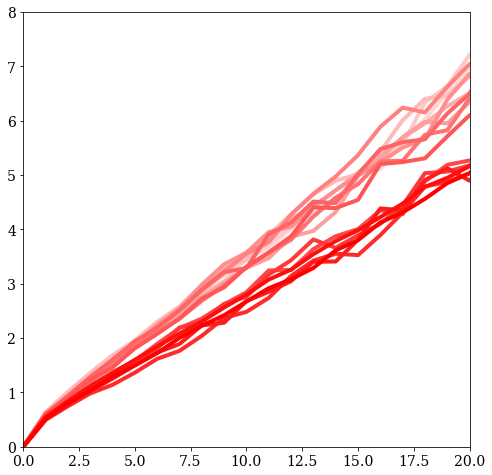

In [343]:
ff[0].get_figure()
gg[0].get_figure()


/home/hbhattar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


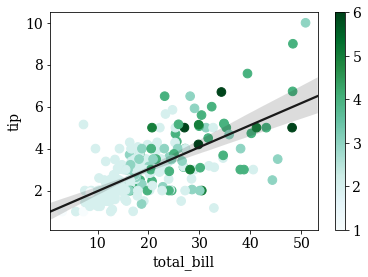

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

points = plt.scatter(tips["total_bill"], tips["tip"],
                     c=tips["size"], s=75, cmap="BuGn")
plt.colorbar(points)

sns.regplot("total_bill", "tip", data=tips, scatter=False, color=".1")

In [527]:

from matplotlib import rcParams
params = {
    'font.family':'serif',
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   }
rcParams.update(params)

class corrFxCompare(object):
    def __init__(self, fileName1, fileName2,skip=0, legend=False, N=300,xmax = 1e6, xmin = 0,ymin=0,ymax=1000,color1='blue',color2="red",z = [] ):
        self.fileName1 = fileName1
        self.fileName2 = fileName2
        self.N = N
        self.xmax = xmax
        self.xmin = xmin
        self.ymax = ymax
        self.ymin = ymin
        self.z = z
        self.color1 = color1
        self.color2 = color2
        self.skip = skip
        self.legend = legend
    def set_ymax(self, ymax):
        self.ymax = ymax
    def set_xmax(self,xmax):
        self.xmax = xmax
    def set_index(self,z):
        self.z = z
    def set_color(self, color1, color2):
        self.color1 = color1
        self.color2 = color2
    def set_legend(self,legend):
        self.legend = legend
    def Plot(self):
        import seaborn as sns
        palette1 = sns.light_palette(self.color1, self.N)
        palette2 = sns.light_palette(self.color2, self.N)
        f = pd.read_csv(self.fileName1, delimiter = "\t", header = None, skiprows=self.skip)
        g = pd.read_csv(self.fileName2, delimiter = "\t", header = None, skiprows=self.skip)
        fig1 = plt.figure(num=None, figsize=(8,8))
        ax1 =  fig1.add_subplot()
        N = self.N
        if len(self.z)==0:
            self.z = range(1,N)
        plt.xlim(self.xmin,self.xmax)
        plt.ylim(self.ymin,self.ymax)
        for columns in range(0,len(self.z)):
            plt.plot(f[self.z[columns]],color = palette1[columns],label=str(self.z[columns]),linewidth=4)
        for columns in range(0,len(self.z)):
            plt.plot(g[self.z[columns]],color = palette2[columns],label=str(self.z[columns]),linewidth=4,linestyle="dashed")
        if self.legend:
            plt.legend(loc=2,prop={'size':12}, title ="Index",ncol =5)
        sns.palplot(sns.light_palette(self.color1))
        sns.palplot(sns.light_palette(self.color2))
        
        

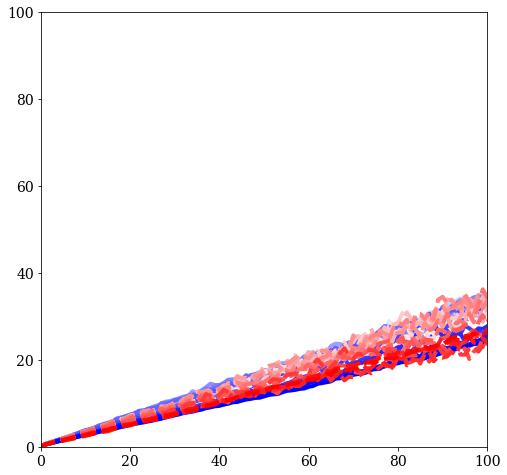

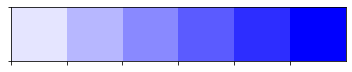

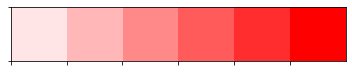

In [539]:
file1 = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorr"
file2 = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MFWN.rCorr"
#z = range()
z=[x for x in range(90,107)]
#z=[107]
corr = corrFxCompare(file1,file2,N=len(z),legend=False,xmin=0,xmax= 100,z=z, ymax=100)
#corr.set_ymax(10)
#corr.set_xmax(60)
corr.Plot()

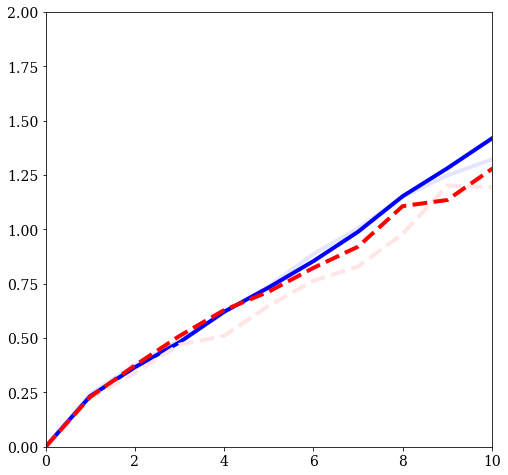

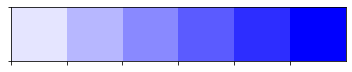

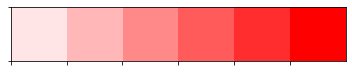

In [529]:
file1 = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorrYZ"
file2 = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MFWN.rCorrYZ"
#z = range()
z=[x for x in range(103,105)]
#z=[107]
corr = corrFxCompare(file1,file2,N=len(z),xmin=0,xmax= 10,z=z, ymax=2)
#corr.set_ymax(10)
#corr.set_xmax(60)
corr.Plot()

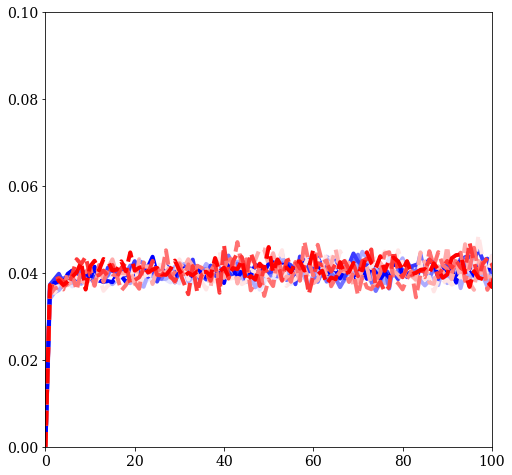

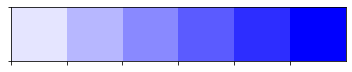

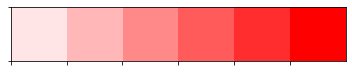

In [484]:
file1 = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorrZZ"
file2 = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MFWN.rCorrZZ"
#z = range()
z=[x for x in range(100,105)]
#z=[107]
corr = corrFxCompare(file1,file2,N=len(z),xmin=0,xmax= 100,z=z, ymax=0.1)
#corr.set_ymax(10)
#corr.set_xmax(60)
corr.Plot()

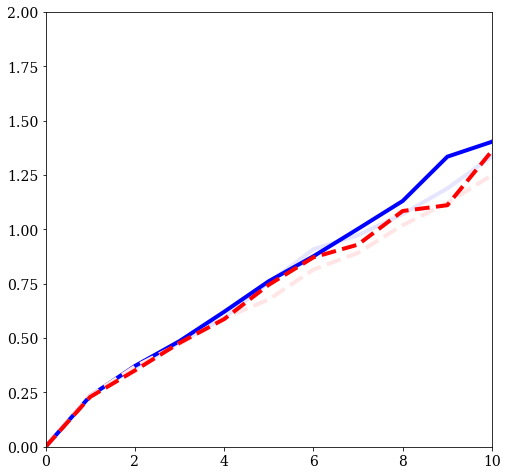

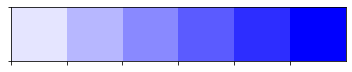

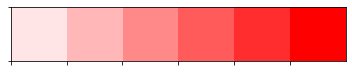

In [487]:
file1 = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorrXZ"
file2 = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MFWN.rCorrXZ"
#z = range()
z=[x for x in range(103,105)]
#z=[107]
corr = corrFxCompare(file1,file2,N=len(z),xmin=0,xmax= 10,z=z, ymax=2)
#corr.set_ymax(10)
#corr.set_xmax(60)
corr.Plot()

In [515]:
a=[[1,2],[3,4]]
b=np.array(a)
m,n = b.shape
m,n

(2, 2)

In [509]:
b[:,1]

array([2, 4])

In [505]:
n=["1","2","3"]

In [508]:
list(map(float,n))

[1.0, 2.0, 3.0]

In [513]:
b[b[:,0]>1,:]

array([[3, 4]])

In [516]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [517]:
"ram".split("/")

['ram']

In [541]:
float("1e5")

100000.0

In [544]:
file = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorr"
f = pd.read_csv(file, delimiter = "\t", header=None)

In [545]:
f.head()


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,1000,0.576874,0.595725,0.592055,0.589781,0.597285,0.588531,0.613319,0.594349,0.610229,...,0.580519,0.585579,0.597128,0.588786,0.588886,0.609573,0.588946,0.591199,0.588124,0.59546
2,2000,0.910764,0.923849,0.944512,0.896282,0.940450,0.944380,0.946707,0.910789,0.942755,...,0.947164,0.875242,0.948763,0.930795,0.927677,0.936102,0.945418,0.931002,0.919116,0.91430
3,3000,1.214630,1.267090,1.291560,1.223800,1.259160,1.260740,1.238140,1.256000,1.283710,...,1.216600,1.202420,1.272920,1.231060,1.243090,1.261980,1.239770,1.183390,1.258030,1.24287
4,4000,1.486810,1.525470,1.583990,1.494790,1.591200,1.613360,1.593730,1.591590,1.559120,...,1.509000,1.503370,1.597580,1.563670,1.580780,1.611810,1.537630,1.509000,1.549220,1.53235


In [558]:
plt.plot(f[0],f[105]/(f[0]))
plt.show()

TypeError: unsupported operand type(s) for /: 'float' and 'str'

In [557]:
f[0]+1

TypeError: must be str, not int

In [559]:
x = np.arange(10)

In [561]:
x+1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [16]:
f=lambda x,y : x*y

In [17]:
x=[1,2,3,4]
y=[5,6,7,8]
list(map(f,x,y))

[5, 12, 21, 32]

In [19]:
from functools import reduce
reduce(f,range(1,101))

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

In [21]:
import numpy as np
x = np.arange(1000)

In [22]:
from __future__ import print_function, division
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from platform import python_version

print(python_version())

3.6.8


In [23]:
folder = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/"
file = "MFWN_Dynamics_Restricted_Vcorr.pspect"

In [50]:
f=pd.read_csv(folder+file,delimiter="\t",skiprows=0,names=['f','I'])

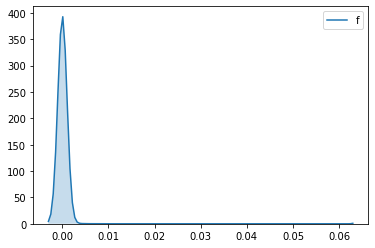

In [74]:
sb.kdeplot(1/f['f'],bw=0.001, shade=True)

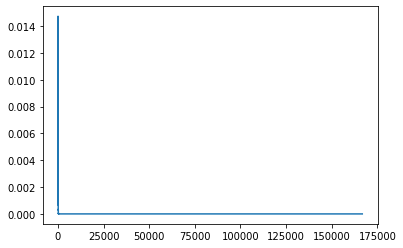

In [54]:
plt.plot(f['f'],f['I'])